# Volumetric analysis

This analysis is based on the quantification of the volume of lesions (in practice, volumes are often approximated by 1D of 2D measures). Then, some criteria (MacDonald [[1]](https://pubmed.ncbi.nlm.nih.gov/2358840/), RECIST [[2]](https://europepmc.org/article/med/10655437), RANO [[3]](https://pubmed.ncbi.nlm.nih.gov/20231676/), and their different revisions) can be used to assess the tumor response from these measures.

In [1]:
import os
import sys
sys.path.append("C:\\Users\\Fabien Boux\\Code\\ClinLib")

from functions.config import Config
config = Config()
config.read()

from clinlib.database import Database
database = Database(config.get_value('database', section='PATH'), idlength=3)
database.add_resource({'metadata': os.path.join(config.get_value('database', section='PATH'), config.get_value('metadata', section='PATH'))})

import ipywidgets as widgets
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
from IPython.display import display

## Evolution

In [6]:
%matplotlib widget

import pandas as pd
from functions.graph import volumetry_plot

def plot_vol(Size=5, Number=5, Stat='mean'):   
    visits = (config.get_value('visits') if config.is_key('visits') else None)
    fig = volumetry_plot(database, visits=visits, stat=Stat)
    plt.show()

interact(plot_vol, Size=(0,1e2,.1), Number=(0,1e2,1), Stat=['mean', 'median']);

interactive(children=(FloatSlider(value=5.0, description='Size'), FloatSlider(value=5.0, description='Number',…

## Response

At this moment, only few criteria are implemented: 
- the revised RECIST (mRECIST) according to [[4]](https://www.sciencedirect.com/science/article/abs/pii/S0959804908008733),
- our own modified RECIST (new_mRECIST).

A patient is considered to have an objective response when the best overall response of a patient is either a Partial Response (PR) or Complete Response (CR). Then, the Objective Response Rate (ORR) is the percentage of patients with PR or CR.

interactive(children=(Dropdown(description='Criteria', options=('mRECIST', 'new_mRECIST'), value='mRECIST'), O…

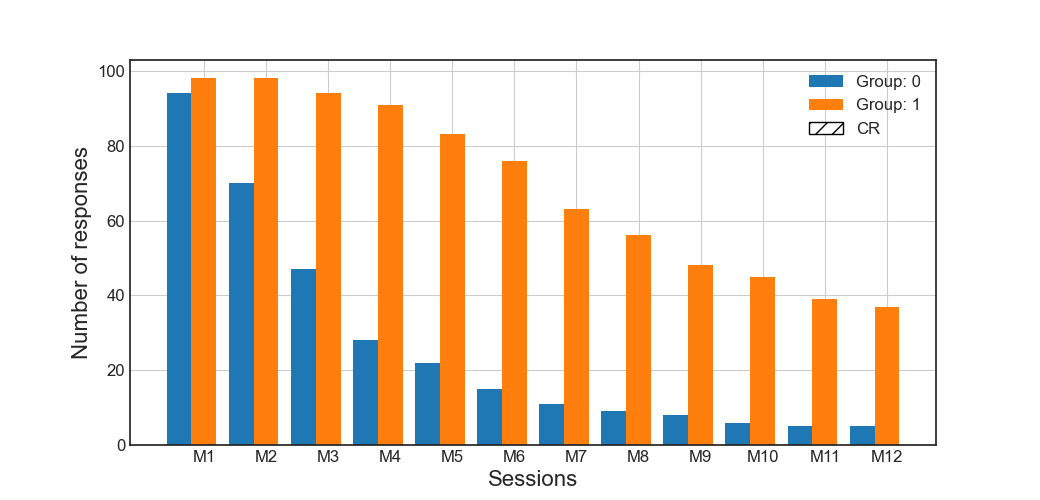

In [3]:
%matplotlib widget

import pandas as pd
from functions.graph import response_rate_plot

visits = (config.get_value('visits') if config.is_key('visits') else None)

def plot_rr(Criteria='mRECIST', Visits='ert'):   
    fig = response_rate_plot(database, visits=Visits, criteria=Criteria)
    plt.show()
    
def plot_rr2(Criteria='mRECIST'):   
    fig = response_rate_plot(database, visits=None, criteria=Criteria)
    plt.show()

if visits is None:
    interact(plot_rr2, Criteria=['mRECIST', 'new_mRECIST'])
else:
    interact(plot_rr, Criteria=['mRECIST', 'new_mRECIST'], Visits=visits)